In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/exchange_rate.csv", parse_dates=['date'], index_col='date')

# Display the first few rows
print(data.head())


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


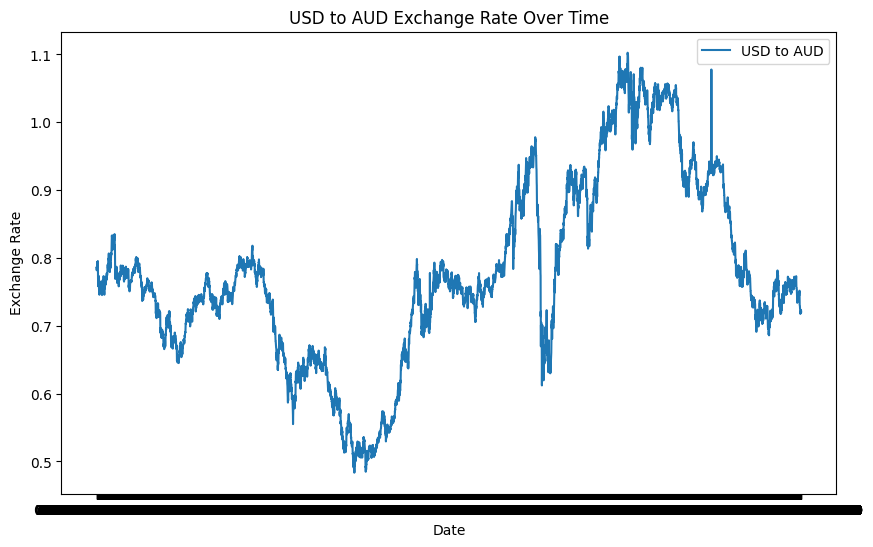

In [2]:
# Plot the time series for USD to Australian Dollar
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.legend()
plt.show()


In [3]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., forward fill)
data.fillna(method='ffill', inplace=True)


Ex_rate    0
dtype: int64


<ipython-input-3-f6124e14d171>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


<Figure size 1200x600 with 0 Axes>

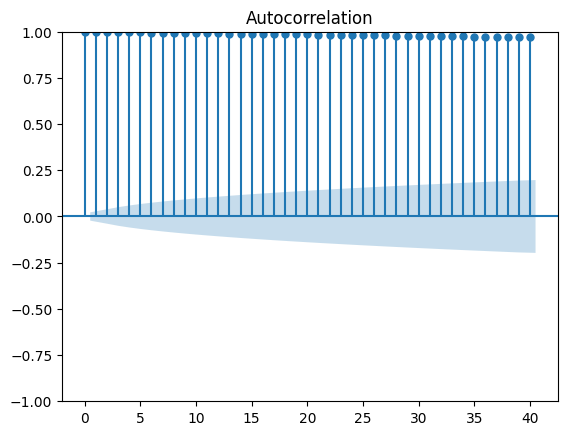

<Figure size 1200x600 with 0 Axes>

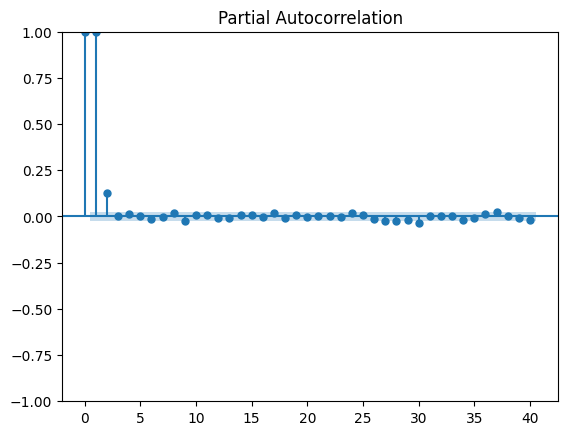

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(data['Ex_rate'], lags=40)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Ex_rate'], lags=40)
plt.show()


In [5]:
from statsmodels.tsa.arima.model import ARIMA



In [6]:
# Fit the ARIMA model
model = ARIMA(data['Ex_rate'])  # Replace p, d, q with chosen values
arima_result = model.fit()

# Print summary
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                          ARIMA   Log Likelihood                4337.879
Date:                Sat, 17 Aug 2024   AIC                          -8671.758
Time:                        12:26:13   BIC                          -8657.890
Sample:                             0   HQIC                         -8666.999
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.002    485.265      0.000       0.774       0.780
sigma2         0.0187      0.000     55.195      0.000       0.018       0.019
Ljung-Box (L1) (Q):                7575.95   Jarque-

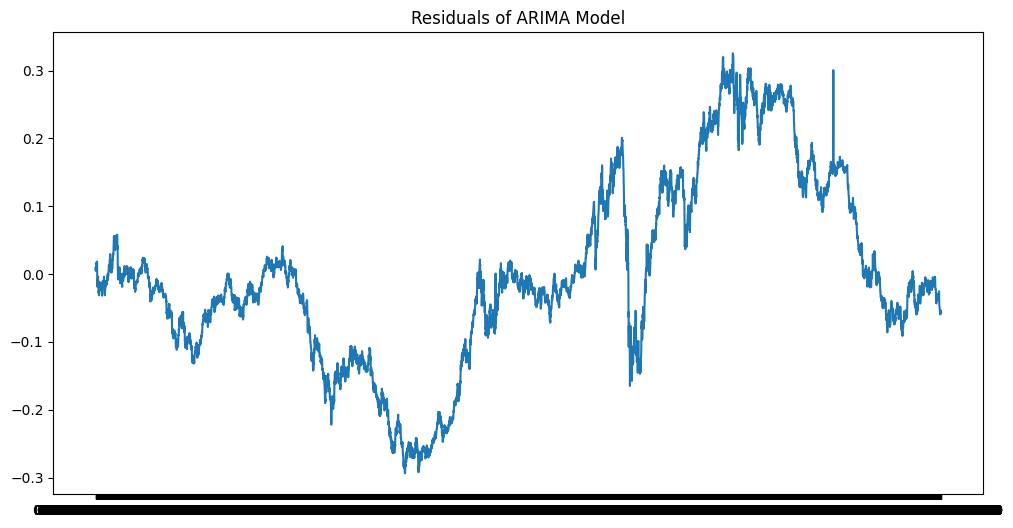

<Figure size 1200x600 with 0 Axes>

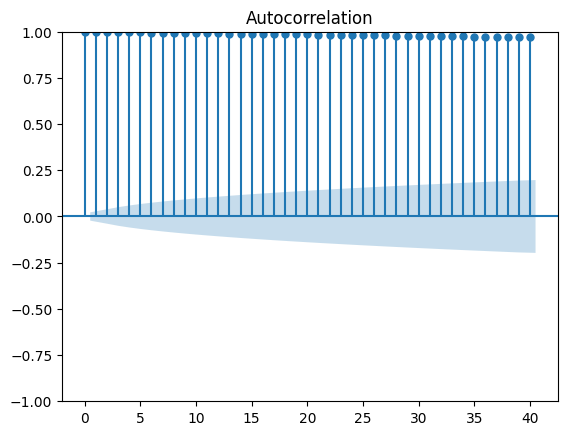

In [7]:
# Plot residuals
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40)
plt.show()


In [9]:
# Forecast future values
forecast = arima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=data.index[-1], periods=31)
forecast_values = forecast.predicted_mean


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


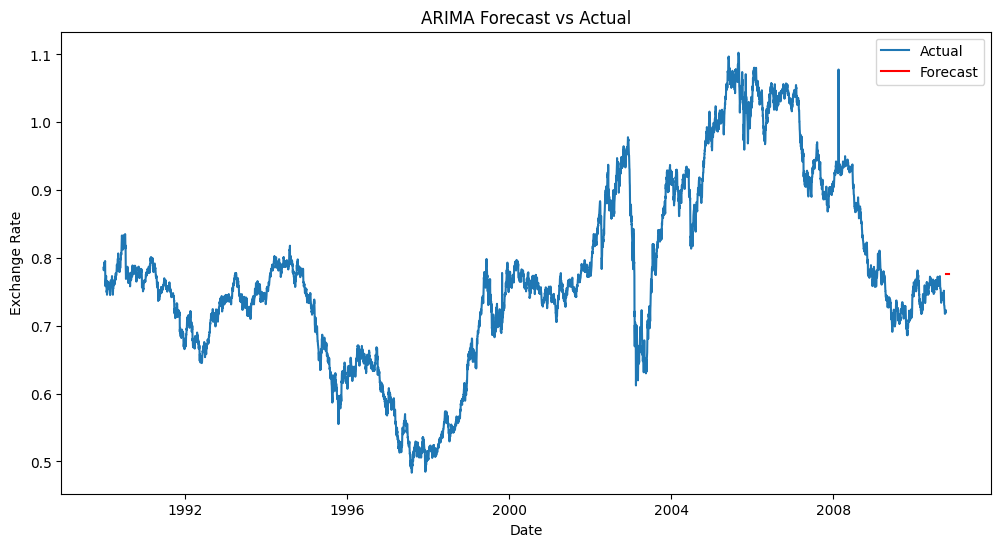

In [16]:
# Forecast future values
forecast = arima_result.get_forecast(steps=30)

# Ensure the index is datetime and localize it to a specific timezone
# (replace 'your_timezone' with the actual timezone of your data)
data.index = pd.to_datetime(data.index, format='%d-%m-%Y %H:%M')  # Specify the correct format
last_date = data.index[-1].tz_localize('US/Eastern')

# Generate forecast index with 30 periods instead of 31
forecast_index = pd.date_range(start=last_date, periods=30)  # Change from 31 to 30
forecast_values = forecast.predicted_mean

#Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Choose and fit the model (e.g., Holt-Winters)
model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)
hw_result = model.fit()

# Print summary
print(hw_result.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Sat, 17 Aug 2024
Box-Cox:                          False   Time:                         12:37:26
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


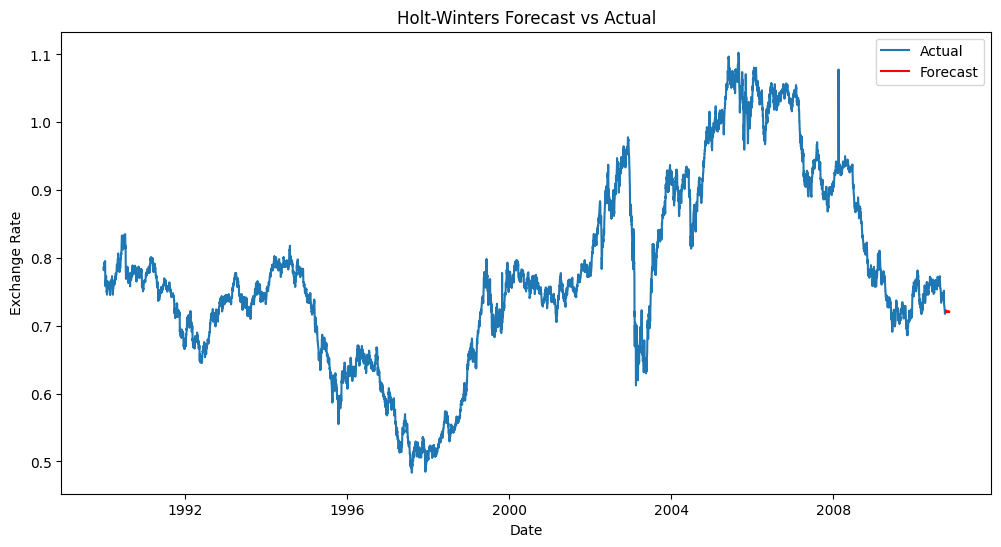

In [18]:
# Forecast future values
hw_forecast = hw_result.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast_index, hw_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Holt-Winters Forecast vs Actual')
plt.legend()
plt.show()


In [20]:
import numpy as np

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
actual_values = data['Ex_rate'][-30:]  # Adjust as necessary
arima_forecast_values = arima_result.forecast(steps=30)
hw_forecast_values = hw_result.forecast(steps=30)

arima_mae = mean_absolute_error(actual_values, arima_forecast_values)
arima_rmse = mean_squared_error(actual_values, arima_forecast_values, squared=False)
arima_mape = np.mean(np.abs((actual_values - arima_forecast_values) / actual_values)) * 100

hw_mae = mean_absolute_error(actual_values, hw_forecast_values)
hw_rmse = mean_squared_error(actual_values, hw_forecast_values, squared=False)
hw_mape = np.mean(np.abs((actual_values - hw_forecast_values) / actual_values)) * 100

print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Holt-Winters - MAE: {hw_mae}, RMSE: {hw_rmse}, MAPE: {hw_mape}%")


ARIMA - MAE: 0.04423064587289217, RMSE: 0.045857095763540516, MAPE: nan%
Holt-Winters - MAE: 0.012893873162132911, RMSE: 0.017130676033911125, MAPE: nan%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-22-bc44c9adf278>:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  arima_mape = np.mean(np.abs((actual_values - arima_forecast_values) / actual_values)) * 100
